# Modelo para detección de señales de tránsito versión activa actualmente en el sistema (VERSIÓN FINAL)

In [39]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import json
import glob
import pandas as pd

In [40]:
model = YOLO('yolov8n.pt')

En caso de ser necesario que solamente carguemos el modelo y no tener que entrenarlo nuevamente comentamos y descomentamos los fragmentos de código necesarios.

In [41]:
# Entrenar el modelo
model.train(
    data='dataset.yaml',
    imgsz=416,
    epochs=25,
    batch=8,
    lr0=0.001,
    patience=20,
    optimizer='AdamW',
    weight_decay=0.0005,
    name='yolov8_traffic_sign_model_finetuned_real_time',
    device='cpu'
)


# # Cargar el modelo entrenado usando el archivo de pesos guardado
# model = YOLO('yolov8_traffic_sign_model_finetuned_real_time.pt')  # Ruta a los pesos del modelo entrenado



New https://pypi.org/project/ultralytics/8.3.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.94 🚀 Python-3.10.5 torch-2.4.0 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=25, time=None, patience=20, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=yolov8_traffic_sign_model_finetuned_real_time8, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

train: Scanning /Users/marcojurado/Documents/GitHub/car_buddy/datasets/split_dataset/train/labels.cache... 8164 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8164/8164 [00:00<?, ?it/s]
val: Scanning /Users/marcojurado/Documents/GitHub/car_buddy/datasets/split_dataset/val/labels.cache... 1750 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1750/1750 [00:00<?, ?it/s]

Plotting labels to runs/detect/yolov8_traffic_sign_model_finetuned_real_time8/labels.jpg... 


optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/yolov8_traffic_sign_model_finetuned_real_time8
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G     0.1611      1.265     0.9155         15        416: 100%|██████████| 1021/1021 [12:50<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:28<00:00,  1.35s/it]

                   all       1750       1750       0.56      0.722      0.733      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G     0.1251     0.8786     0.9008         12        416: 100%|██████████| 1021/1021 [12:33<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750      0.841      0.874      0.921      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G     0.1169     0.7549     0.8975         14        416: 100%|██████████| 1021/1021 [12:35<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:26<00:00,  1.33s/it]

                   all       1750       1750      0.858      0.874      0.923      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G     0.1015     0.6881     0.8959         11        416: 100%|██████████| 1021/1021 [12:33<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750       0.89      0.887      0.948      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G    0.09482      0.647     0.8962         10        416: 100%|██████████| 1021/1021 [12:32<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750      0.901      0.913      0.958      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G    0.08822     0.6157     0.8947         14        416: 100%|██████████| 1021/1021 [12:32<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750      0.897      0.912      0.963      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G    0.08119     0.5708     0.8929         14        416: 100%|██████████| 1021/1021 [12:33<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750      0.898      0.921      0.949      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G    0.07844     0.5553     0.8914         14        416: 100%|██████████| 1021/1021 [12:33<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750       0.91      0.924      0.965      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G    0.07459     0.5241     0.8893         11        416: 100%|██████████| 1021/1021 [12:33<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750      0.937      0.924      0.966      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G    0.06951     0.5215     0.8889         14        416: 100%|██████████| 1021/1021 [12:32<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750      0.877      0.939      0.965      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G    0.06598     0.5061     0.8879         16        416: 100%|██████████| 1021/1021 [12:38<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:30<00:00,  1.37s/it]

                   all       1750       1750      0.945      0.911      0.972      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G    0.06263     0.4847     0.8902         12        416: 100%|██████████| 1021/1021 [13:08<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:30<00:00,  1.37s/it]

                   all       1750       1750       0.91      0.912      0.972      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G    0.06203     0.4812     0.8913         15        416: 100%|██████████| 1021/1021 [13:06<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:30<00:00,  1.37s/it]

                   all       1750       1750      0.941      0.936      0.975      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G    0.05834     0.4677      0.891         11        416: 100%|██████████| 1021/1021 [13:06<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:30<00:00,  1.37s/it]

                   all       1750       1750      0.935      0.944      0.975      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G    0.05643     0.4424     0.8886         11        416: 100%|██████████| 1021/1021 [13:04<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:28<00:00,  1.35s/it]

                   all       1750       1750      0.944      0.932      0.973      0.973


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G    0.05587     0.3279     0.9078          4        416: 100%|██████████| 1021/1021 [12:25<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750      0.947      0.937      0.978      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G      0.047     0.2618     0.9012          4        416: 100%|██████████| 1021/1021 [12:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750      0.966      0.938      0.982      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G    0.04294      0.244     0.9041          4        416: 100%|██████████| 1021/1021 [12:25<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750       0.95      0.932      0.978      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G    0.04314     0.2231      0.901          4        416: 100%|██████████| 1021/1021 [12:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750       0.96      0.964      0.987      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G    0.03405     0.2027     0.9048          4        416: 100%|██████████| 1021/1021 [12:25<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750       0.95      0.962      0.987      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G    0.03283      0.192     0.9023          4        416: 100%|██████████| 1021/1021 [12:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:28<00:00,  1.35s/it]

                   all       1750       1750      0.957      0.957      0.986      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G    0.02824     0.1687     0.8995          4        416: 100%|██████████| 1021/1021 [12:25<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750      0.974      0.968       0.99       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G    0.02521     0.1511     0.9005          4        416: 100%|██████████| 1021/1021 [12:27<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750      0.972      0.969       0.99       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G    0.02404     0.1419     0.9014          4        416: 100%|██████████| 1021/1021 [12:27<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750      0.974      0.974      0.991      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G    0.02153     0.1299      0.899          4        416: 100%|██████████| 1021/1021 [12:26<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:27<00:00,  1.34s/it]

                   all       1750       1750      0.977      0.965       0.99       0.99



25 epochs completed in 6.285 hours.
Optimizer stripped from runs/detect/yolov8_traffic_sign_model_finetuned_real_time8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_traffic_sign_model_finetuned_real_time8/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_traffic_sign_model_finetuned_real_time8/weights/best.pt...
Ultralytics YOLOv8.2.94 🚀 Python-3.10.5 torch-2.4.0 CPU (Apple M1)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 110/110 [02:21<00:00,  1.28s/it]


                   all       1750       1750      0.974      0.974      0.991      0.991
pedestrian_traffic_light_green        291        291      0.997      0.996      0.995      0.995
pedestrian_traffic_light_red        292        292      0.995      0.986      0.995      0.995
   traffic_light_green        292        292      0.961      0.928      0.988      0.986
     traffic_light_red        292        292      0.924      0.961      0.981      0.981
  traffic_light_yellow        292        292      0.971      0.983      0.994      0.994
                  stop        291        291      0.998      0.993      0.995      0.995
Speed: 0.4ms preprocess, 78.7ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/yolov8_traffic_sign_model_finetuned_real_time8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x333fcf3a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [42]:
model_path = 'yolov8_traffic_sign_model_finetuned_real_time.pt'
model.save(model_path)
print(f"Modelo optimizado guardado en: {model_path}")

Modelo optimizado guardado en: yolov8_traffic_sign_model_finetuned_real_time.pt


Podemos ver las metricas de entrenamiento en la carpeta de runs/detect/

### Evaluación del Modelo

In [43]:
# Evaluar el modelo en el conjunto de prueba
results = model.val(data='dataset.yaml', split='test')

Ultralytics YOLOv8.2.94 🚀 Python-3.10.5 torch-2.4.0 CPU (Apple M1)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/marcojurado/Documents/GitHub/car_buddy/datasets/split_dataset/test/labels.cache... 1750 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1750/1750 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [01:04<00:00,  3.37it/s]


                   all       1750       1750      0.958      0.971       0.99       0.99
pedestrian_traffic_light_green        292        292      0.988      0.986      0.994      0.994
pedestrian_traffic_light_red        291        291      0.991      0.993      0.995      0.995
   traffic_light_green        292        292      0.967      0.913      0.984      0.984
     traffic_light_red        292        292      0.894      0.953      0.981      0.981
  traffic_light_yellow        291        291      0.912      0.993      0.991      0.991
                  stop        292        292      0.997       0.99      0.995      0.995
Speed: 0.4ms preprocess, 34.8ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/yolov8_traffic_sign_model_finetuned_real_time82


### Pruebas de inferencia del modelo

In [44]:
# Realizar predicciones con el modelo entrenado
predictions = model.predict(source='split_dataset/test/images', save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1750 /Users/marcojurado/Documents/GitHub/car_buddy/Traffic_Signs_Model/split_dataset/test/images/20170701_105442_jpg_rf_142da3d52cafe57e710cfaa35c19a216_low_brightness.jpg: 416x416 1 traffic_light_green, 45.6ms
image 2/1750 /Users/marcojurado/Documents/GitHub/car_buddy/Traffic_Signs_Model/split_dataset/test/images/20170701_105442_jpg_rf_5184fc4338e9835ed39bae8ed37b8a18_rot_180.jpg: 416x416 1 traffic_light_green, 40.2ms
image 3/1750 /Users/marco

## Metrcias del modelo

In [45]:
%matplotlib inline

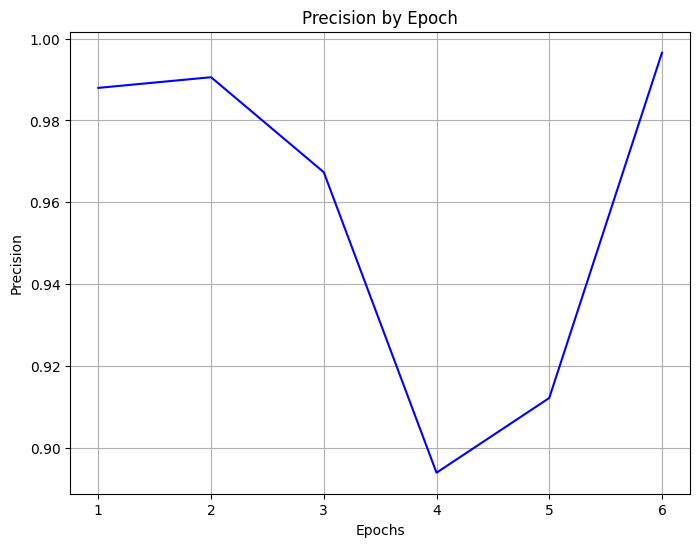

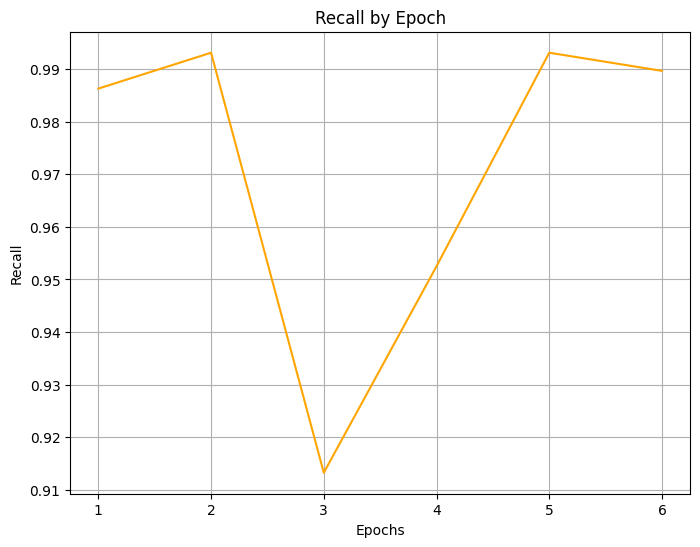

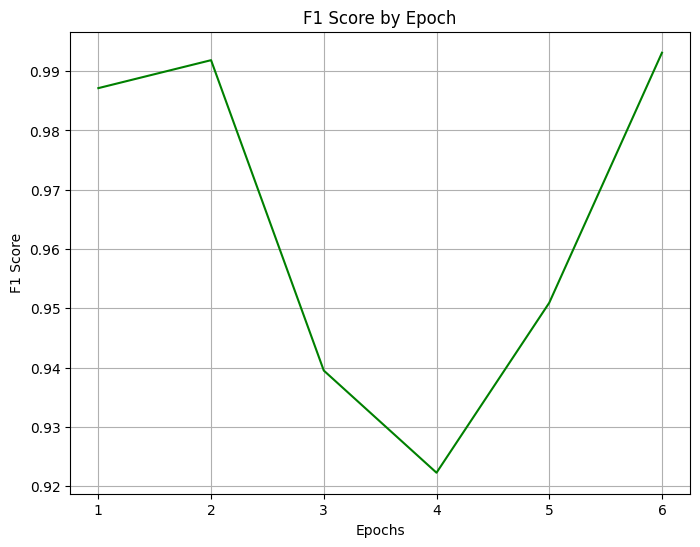

In [46]:
# Supongamos que results contiene los resultados de validación del último epoch
precision = np.array(getattr(results.box, 'p', []))
recall = np.array(getattr(results.box, 'r', []))
mAP_50 = getattr(results.box, 'map', None)
mAP_50_95 = getattr(results.box, 'map95', None)

# Definir epsilon para evitar división por cero
epsilon = 1e-10

# Calcular F1 Score
if precision.size > 0 and recall.size > 0:
    f1 = 2 * (precision * recall) / (precision + recall + epsilon)
else:
    f1 = None

# Calcular Accuracy
accuracy = (mAP_50 + mAP_50_95) / 2 if mAP_50 is not None and mAP_50_95 is not None else None

# Definir las épocas (suponiendo que el número de épocas es igual a la longitud de precision)
epochs = np.arange(1, len(precision) + 1) if precision.size > 0 else []

# Gráfico de Precision
plt.figure(figsize=(8, 6))
plt.plot(epochs, precision, label='Precision', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision by Epoch')
plt.grid(True)
plt.show()

# Gráfico de Recall
plt.figure(figsize=(8, 6))
plt.plot(epochs, recall, label='Recall', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall by Epoch')
plt.grid(True)
plt.show()

# Gráfico de F1 Score
if f1 is not None:
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, f1, label='F1 Score', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.title('F1 Score by Epoch')
    plt.grid(True)
    plt.show()

# Gráfico de Accuracy
if accuracy is not None:
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, [accuracy] * len(epochs), label='Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy by Epoch')
    plt.grid(True)
    plt.show()


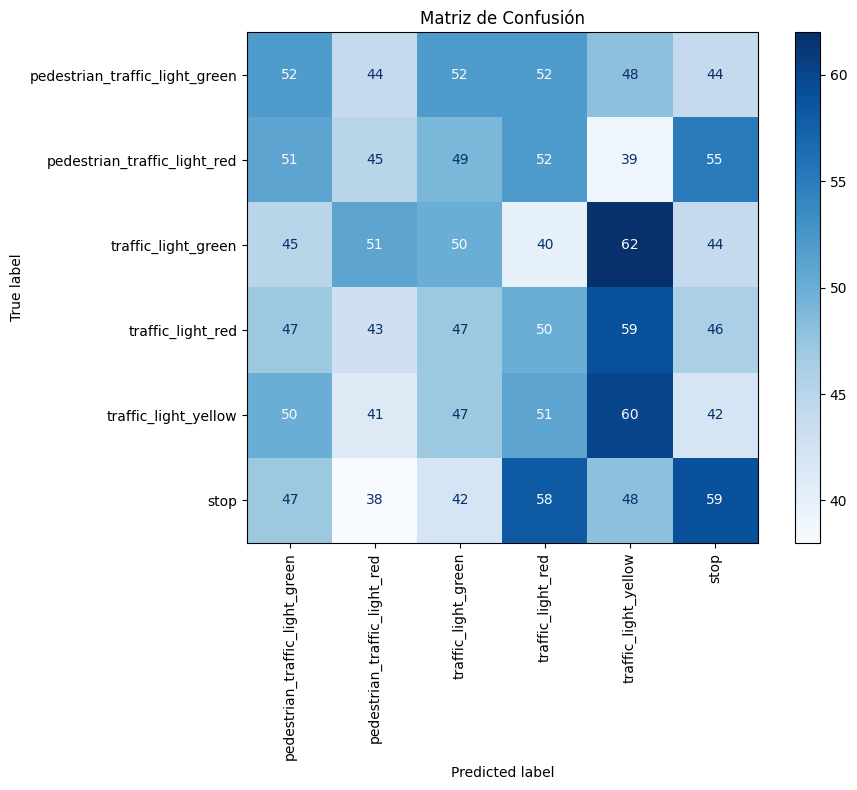

In [47]:
# Obtener nombres de clases
class_names = model.names  # Diccionario que asigna cada índice a su nombre de clase
labels = [class_names[i] for i in range(len(class_names))]  # Lista de nombres de clase en orden

# Inicializar listas para etiquetas verdaderas y predicciones
y_true = []
y_pred = []

# Extraer etiquetas predichas (y_pred) de las predicciones
for prediction in predictions:
    if hasattr(prediction.boxes, 'cls'):
        pred_classes = prediction.boxes.cls.cpu().numpy()  # Convertir a array de numpy
        y_pred.extend(pred_classes)

# Cargar las etiquetas verdaderas (y_true) desde las anotaciones del dataset de prueba
def load_yolo_labels(label_folder):
    y_true = []
    for file in glob.glob(f"{label_folder}/*.txt"):  # Ruta a los archivos de etiquetas en formato YOLO
        with open(file, 'r') as f:
            for line in f:
                class_id = int(line.split()[0])  # Primer valor es el ID de la clase en formato YOLO
                y_true.append(class_id)
    return y_true

# Cargar y_true usando la opción para YOLO
y_true = load_yolo_labels('split_dataset/test/labels')  # Ruta a la carpeta de etiquetas de prueba en formato YOLO

# Ajustar listas para asegurarse de que y_true y y_pred tienen la misma longitud
min_len = min(len(y_true), len(y_pred))
y_true = y_true[:min_len]  # Trim y_true if necessary
y_pred = y_pred[:min_len]  # Trim y_pred if necessary

if y_true and y_pred:
    # Generar y mostrar la matriz de confusión con etiquetas de clase
    conf_matrix = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(10, 8))  # Ajustar el tamaño de la figura
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)  # Usar nombres de clase en los ejes
    disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical')
    plt.title("Matriz de Confusión")

    plt.tight_layout()  # Asegura que todo se ajuste bien en la figura
    plt.show()
else:
    print("Unable to extract true and predicted labels. Please verify label extraction or ground truth loading.")